# Walmart EDA and Preprocessing

## STEP 1 - Data Loading and Preprocessing 

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Styling

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Loading Dataset


In [4]:
train = pd.read_csv(r"D:\Shreeraj Projects\5 End to End\Walmart\Data\train.csv")
test = pd.read_csv(r"D:\Shreeraj Projects\5 End to End\Walmart\Data\test.csv")
stores = pd.read_csv(r"D:\Shreeraj Projects\5 End to End\Walmart\Data\stores.csv")
features = pd.read_csv(r"D:\Shreeraj Projects\5 End to End\Walmart\Data\features.csv")

### Basic Exploration

In [7]:
train.shape, test.shape, stores.shape, features.shape

((421570, 5), (115064, 4), (45, 3), (8190, 12))

In [32]:
print("Train Data:")
display(train.head())
print(train.info())

print("\nStores Data:")
display(stores.head())

print("\nFeatures Data:")
display(features.head())

print("\nTest Data:")
display(test.head())

Train Data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None

Stores Data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Features Data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False



Test Data:


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### Identifying and Cleaning Missing Values

In [8]:
print("Missing Values in Train")
display(train.isnull().sum())

print("\nMissing Values in Stores")
display(stores.isnull().sum())

print("\nMissing Values in Test")
display(test.isnull().sum())

print("\nMissing Values in Features")
display(features.isnull().sum())

Missing Values in Train


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Missing Values in Stores


Store    0
Type     0
Size     0
dtype: int64


Missing Values in Test


Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


Missing Values in Features


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    features[col] = features[col].fillna(0)


In [10]:
# Forward fill + Backward fill for CPI & Unemployment (new syntax)
features['CPI'] = features['CPI'].ffill().bfill()
features['Unemployment'] = features['Unemployment'].ffill().bfill()


### Merging tables

In [11]:
df = train.merge(stores, on="Store", how="left")
df = df.merge(features, on=["Store", "Date", "IsHoliday"], how="left")


In [12]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

### Convert Date Columns to Datetime

In [20]:
df['Date'] = pd.to_datetime(df['Date'])


In [21]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])


## STEP 2 - Feature Engineering

### A)Extract Date-Based Features

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek   # Monday=0, Sunday=6
df['IsMonthStart'] = df['Date'].dt.is_month_start
df['IsMonthEnd'] = df['Date'].dt.is_month_end
df['Quarter'] = df['Date'].dt.quarter


### B)Convert Holiday Column to Binary

In [23]:
df['IsHoliday'] = df['IsHoliday'].astype(int)

### C)Create Store Size Buckets

In [24]:
df['Store_Size_Category'] = pd.cut(
    df['Size'],
    bins=[0, 50000, 150000, 300000],
    labels=['Small', 'Medium', 'Large']
)

### D)Markdown Total Feature

In [25]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)
df['Has_Markdown'] = (df['Total_MarkDown'] > 0).astype(int)

### E)Temperature Buckets

In [26]:
df['Temp_Category'] = pd.cut(
    df['Temperature'],
    bins=[-10, 10, 25, 40, 60, 100],
    labels=['Freezing', 'Cold', 'Moderate', 'Warm', 'Hot']
)

### F)Lag Features

In [27]:
df = df.sort_values(['Store', 'Dept', 'Date'])

df['Sales_Lag_7'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)   # Previous week
df['Sales_Lag_30'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(4) # 4 weeks earlier


### G)Rolling Averages

In [28]:
df['Rolling_4W'] = df.groupby(['Store', 'Dept'])['Weekly_Sales']\
                      .transform(lambda x: x.rolling(window=4).mean())

df['Rolling_12W'] = df.groupby(['Store', 'Dept'])['Weekly_Sales']\
                       .transform(lambda x: x.rolling(window=12).mean())


### H)Price-Related Features

In [29]:
df['PricePressure'] = df['CPI'] * df['Unemployment']
df['Fuel_Category'] = pd.cut(df['Fuel_Price'], bins=4, labels=['Very Low', 'Low', 'High', 'Very High'])


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                421570 non-null  int64         
 1   Dept                 421570 non-null  int64         
 2   Date                 421570 non-null  datetime64[ns]
 3   Weekly_Sales         421570 non-null  float64       
 4   IsHoliday            421570 non-null  int32         
 5   Type                 421570 non-null  object        
 6   Size                 421570 non-null  int64         
 7   Temperature          421570 non-null  float64       
 8   Fuel_Price           421570 non-null  float64       
 9   MarkDown1            421570 non-null  float64       
 10  MarkDown2            421570 non-null  float64       
 11  MarkDown3            421570 non-null  float64       
 12  MarkDown4            421570 non-null  float64       
 13  MarkDown5     

## STEP 3 — EDA

### A) Basic Overview of the Data

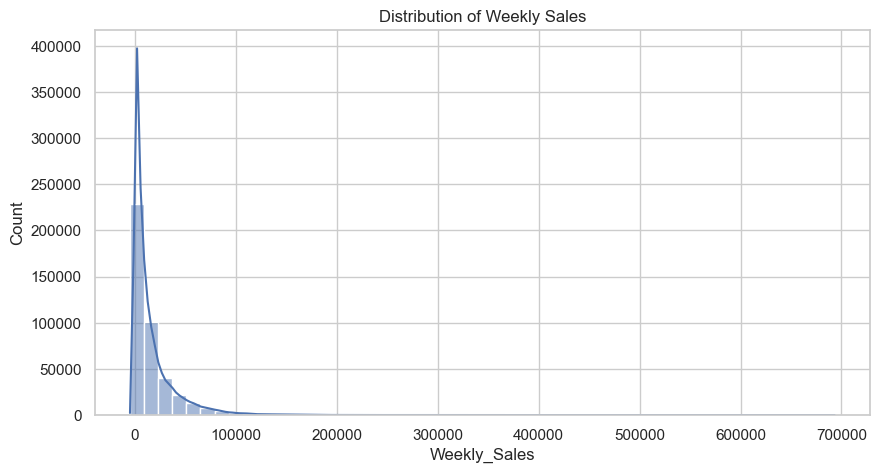

In [31]:
#1. Check distribution of Sales
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

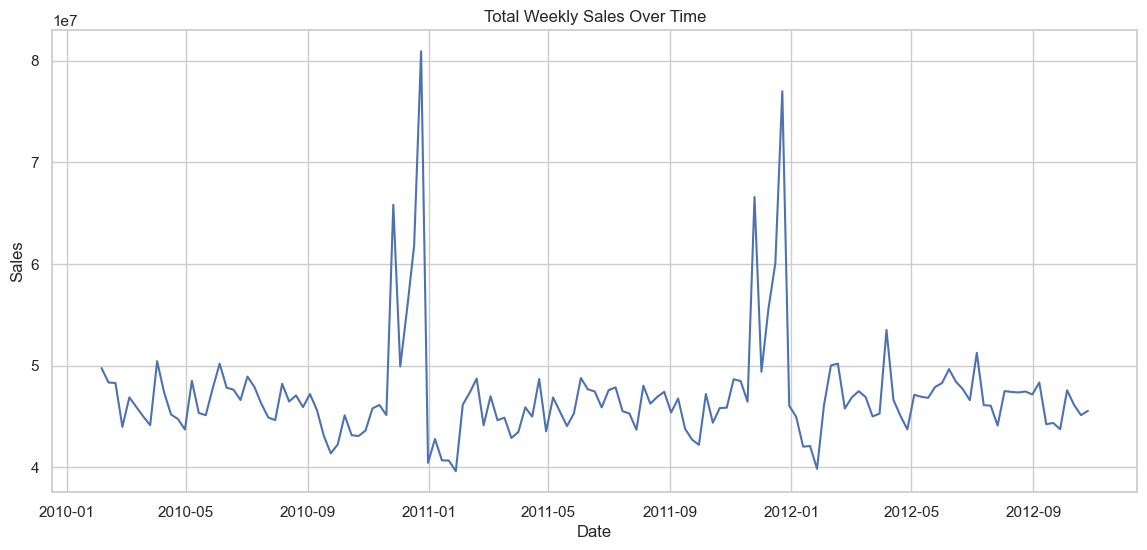

In [32]:
#2. Trend Over Time (Overall)
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'])
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

### B) Store-Level Analysis

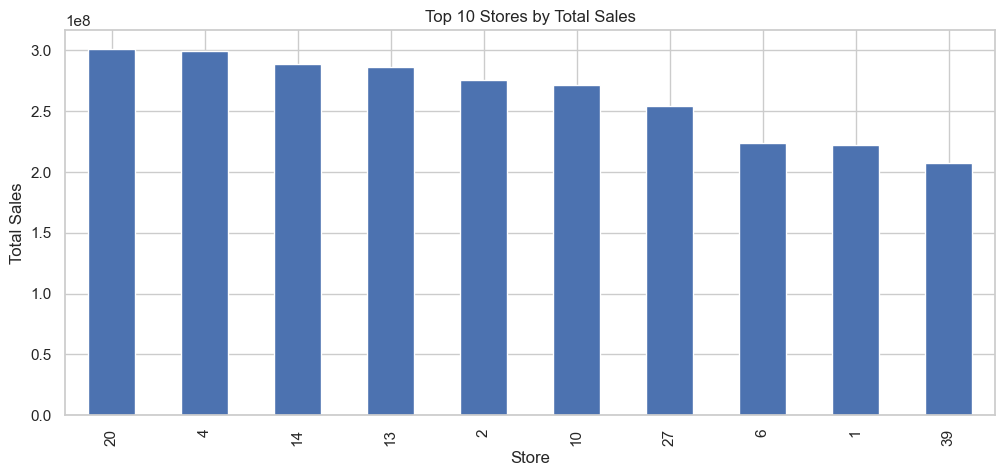

In [33]:
#1. Top 10 Best Performing Stores
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

store_sales.head(10).plot(kind='bar', figsize=(12,5))
plt.title("Top 10 Stores by Total Sales")
plt.ylabel("Total Sales")
plt.show()


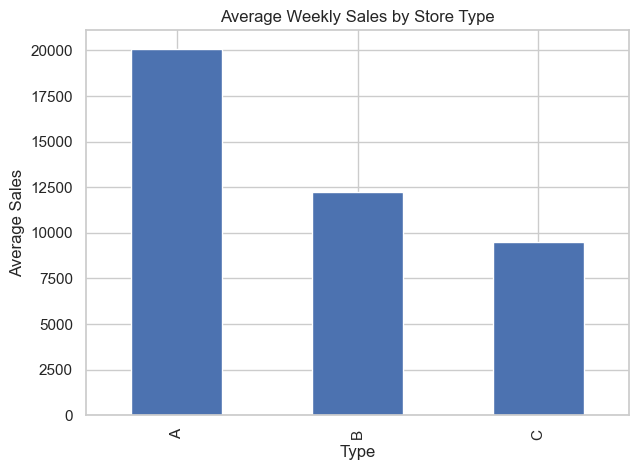

In [34]:
#2. Store Type Impact
type_sales = df.groupby('Type')['Weekly_Sales'].mean()

type_sales.plot(kind='bar', figsize=(7,5))
plt.title("Average Weekly Sales by Store Type")
plt.ylabel("Average Sales")
plt.show()


### C) Department-Level Analysis

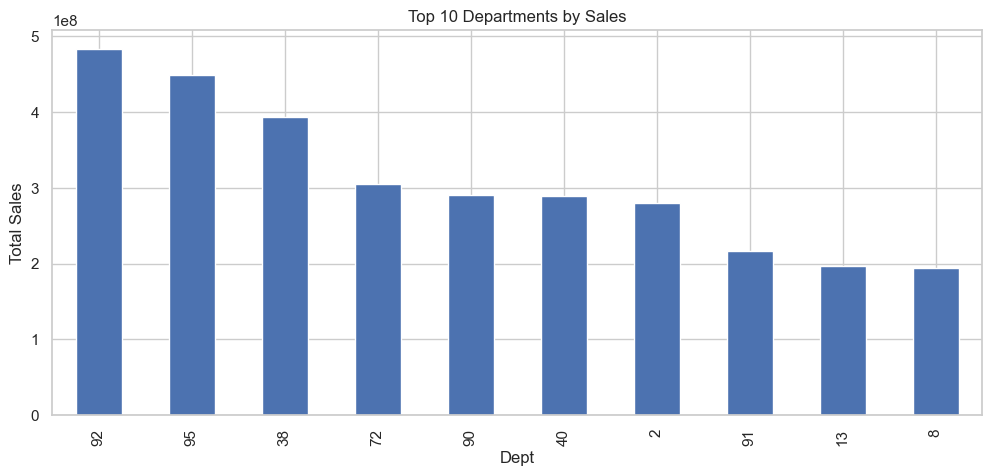

In [35]:
# 1. Top 10 Highest Selling Departments
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

dept_sales.head(10).plot(kind='bar', figsize=(12,5))
plt.title("Top 10 Departments by Sales")
plt.ylabel("Total Sales")
plt.show()


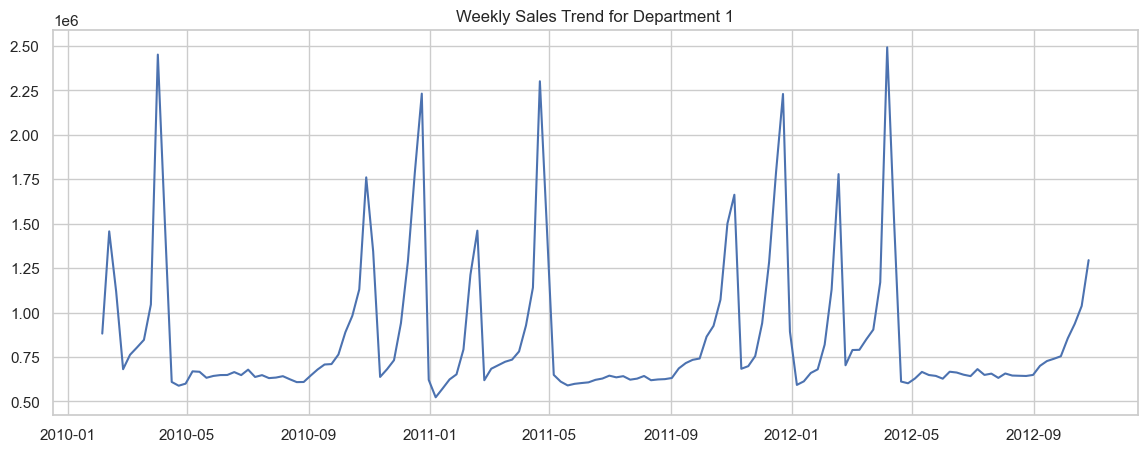

In [36]:
#2. Dept Sales Trend
dept = 1
dept_df = df[df['Dept'] == dept].groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14,5))
plt.plot(dept_df.index, dept_df.values)
plt.title(f"Weekly Sales Trend for Department {dept}")
plt.show()


### D) Holiday Impact Analysis

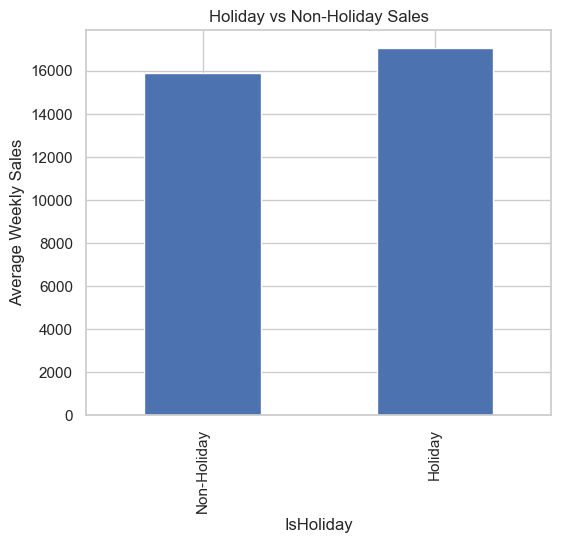

In [37]:
#1. Average Sales — Holiday vs Non-Holiday
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()

holiday_sales.plot(kind='bar', figsize=(6,5))
plt.title("Holiday vs Non-Holiday Sales")
plt.xticks([0,1], ['Non-Holiday','Holiday'])
plt.ylabel("Average Weekly Sales")
plt.show()


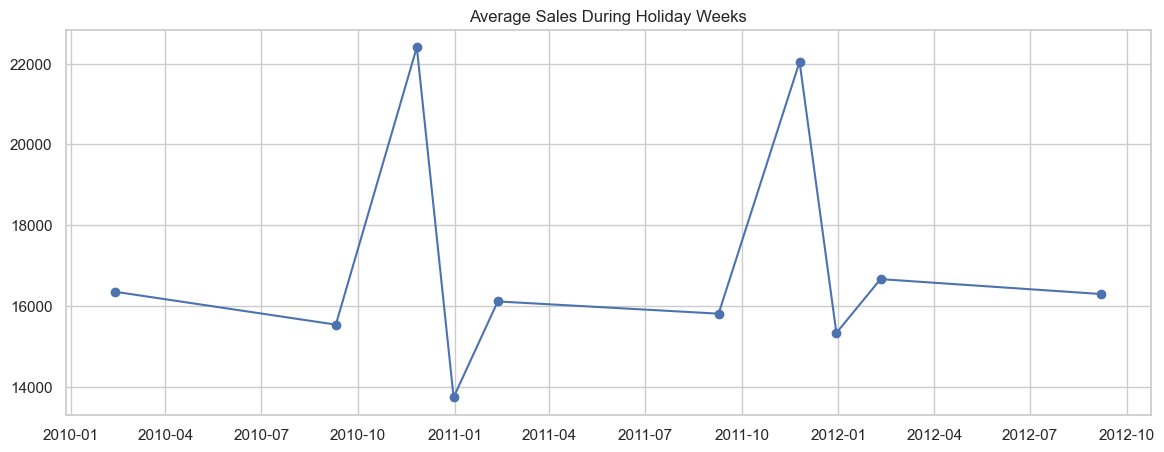

In [38]:
#2. Focus on Major Holidays
holiday_dates = df[df['IsHoliday'] == 1]['Date'].unique()
holiday_dates

holiday_df = df[df['IsHoliday'] == 1].groupby('Date')['Weekly_Sales'].mean()

plt.figure(figsize=(14,5))
plt.plot(holiday_df.index, holiday_df.values, marker='o')
plt.title("Average Sales During Holiday Weeks")
plt.show()


### E) Correlation / Feature Relationships

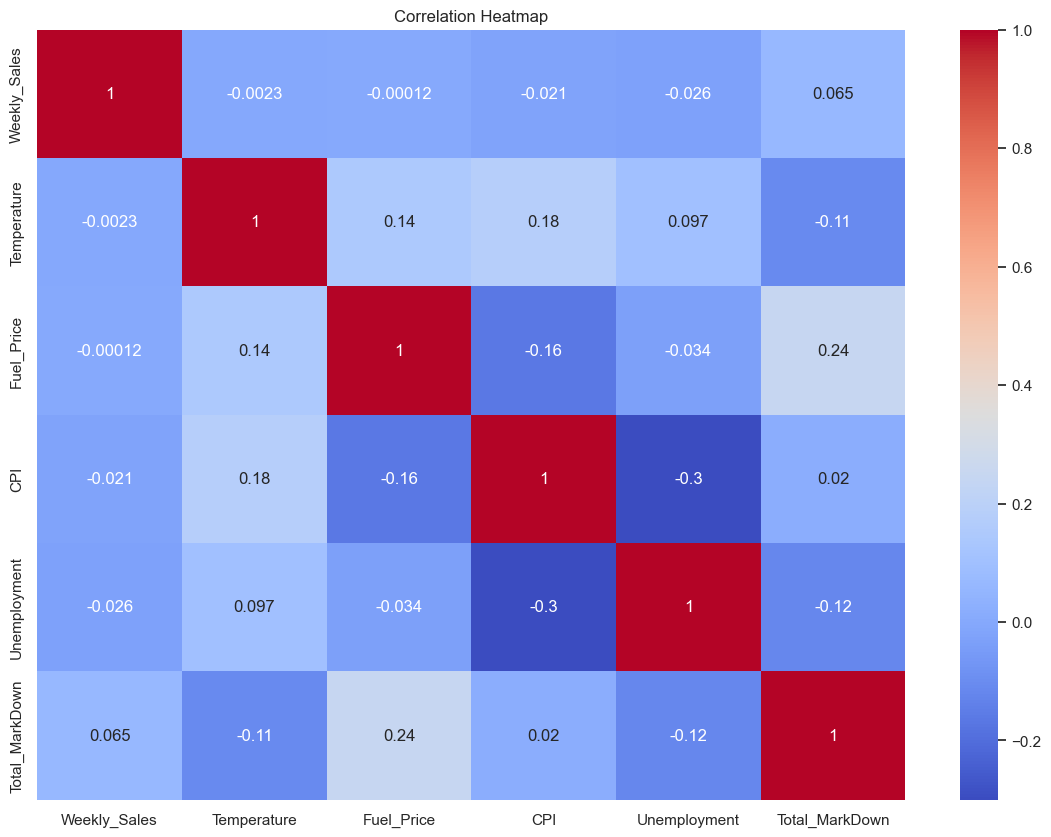

In [39]:
#1. Heatmap of Important Features
plt.figure(figsize=(14,10))
sns.heatmap(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']]
            .corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


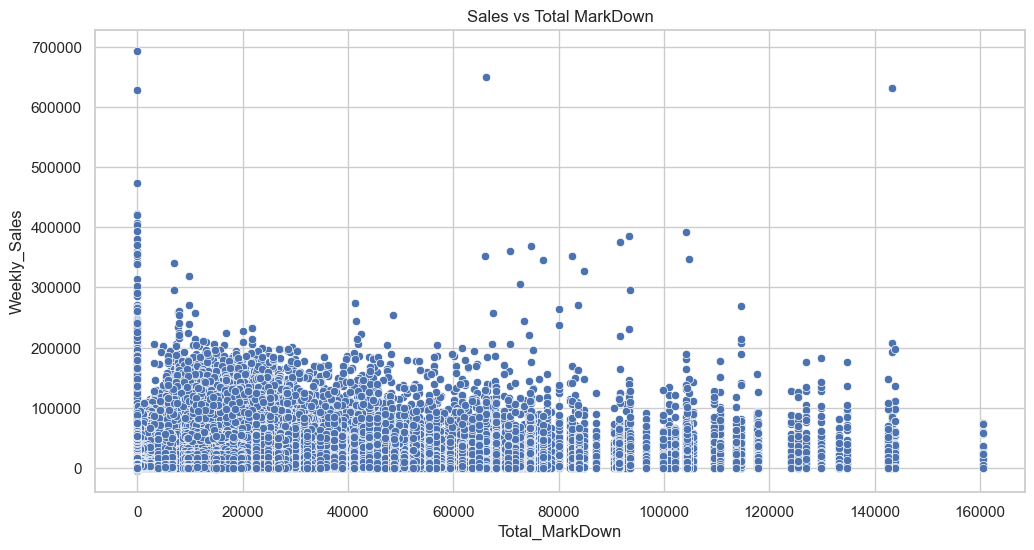

In [40]:
#2. Markdowns vs Sales
sns.scatterplot(data=df, x='Total_MarkDown', y='Weekly_Sales')
plt.title("Sales vs Total MarkDown")
plt.show()


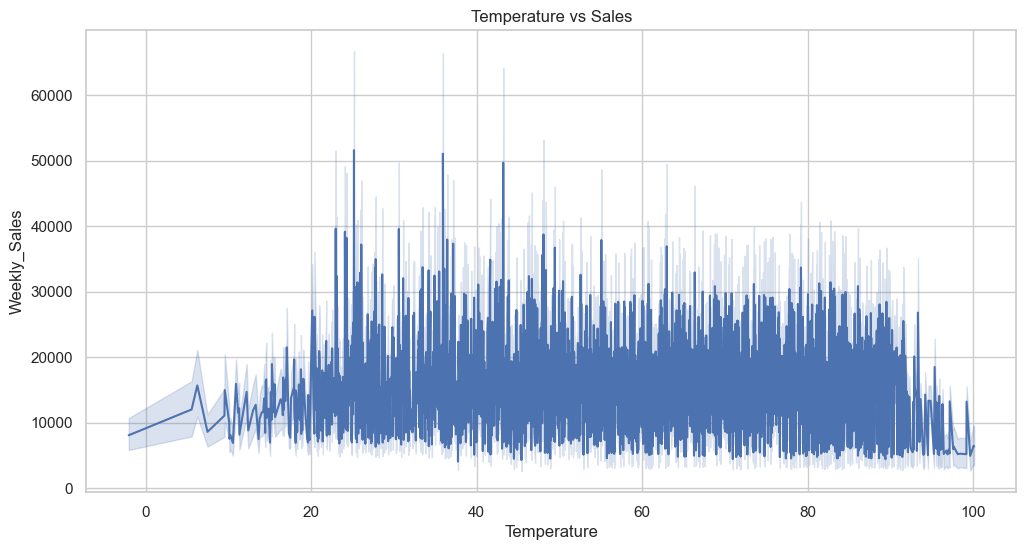

In [41]:
#3. Temperature vs Sales
sns.lineplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Temperature vs Sales")
plt.show()


In [42]:
# Merge test with stores and features
test_full = test.merge(stores, on="Store", how="left")
test_full = test_full.merge(features, on=["Store", "Date", "IsHoliday"], how="left")

# Apply date features
test_full['Date'] = pd.to_datetime(test_full['Date'])
test_full['Year'] = test_full['Date'].dt.year
test_full['Month'] = test_full['Date'].dt.month
test_full['Day'] = test_full['Date'].dt.day
test_full['Week'] = test_full['Date'].dt.isocalendar().week.astype(int)
test_full['DayOfWeek'] = test_full['Date'].dt.dayofweek
test_full['Quarter'] = test_full['Date'].dt.quarter


In [43]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
test_full['Total_MarkDown'] = test_full[markdown_cols].sum(axis=1)
test_full['Has_Markdown'] = (test_full['Total_MarkDown'] > 0).astype(int)


In [44]:
test_full['Store_Size_Category'] = pd.cut(
    test_full['Size'],
    bins=[0, 50000, 150000, 300000],
    labels=['Small', 'Medium', 'Large']
)


In [45]:
test_full['Fuel_Category'] = pd.cut(test_full['Fuel_Price'], bins=4, labels=['Very Low','Low','High','Very High'])

test_full['Temp_Category'] = pd.cut(
    test_full['Temperature'],
    bins=[-10,10,25,40,60,100],
    labels=['Freezing','Cold','Moderate','Warm','Hot']
)


## STEP 4 — Machine Learning Model (Sales Forecasting)

### STEP 4A: Select Features for Modeling

In [46]:
feature_cols = [
    'Store','Dept','IsHoliday','Year','Month','Week','DayOfWeek','Quarter',
    'Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown',
    'Has_Markdown','Size'
]

### STEP 4B: Encode Categorical Columns

In [48]:
from sklearn.preprocessing import LabelEncoder
import pickle
cat_cols = ['Store_Size_Category', 'Fuel_Category', 'Temp_Category']

# Fit encoders on training dataframe (df) and save them
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Persist encoders to disk for reproducibility
import joblib
joblib.dump(encoders, "encoders.joblib")


['encoders.joblib']

In [49]:
print("TRAIN:", df['Store_Size_Category'].unique())
print("TEST :", test_full['Store_Size_Category'].unique())

print("\nTRAIN fuel:", df['Fuel_Category'].unique())
print("TEST  fuel:", test_full['Fuel_Category'].unique())

print("\nTRAIN temp:", df['Temp_Category'].unique())
print("TEST  temp:", test_full['Temp_Category'].unique())



TRAIN: [0 2 1]
TEST : ['Large', 'Small', 'Medium']
Categories (3, object): ['Small' < 'Medium' < 'Large']

TRAIN fuel: [3 1 0 2]
TEST  fuel: ['Low', 'Very Low', 'High', 'Very High']
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

TRAIN temp: [4 3 2 0 1 5]
TEST  temp: ['Warm', 'Hot', 'Moderate', 'Cold', 'Freezing', NaN]
Categories (5, object): ['Freezing' < 'Cold' < 'Moderate' < 'Warm' < 'Hot']


In [50]:
for col in cat_cols:
    test_full[col] = test_full[col].astype(str)


In [51]:
test_full['Temp_Category'] = test_full['Temp_Category'].replace('nan', 'Cold')


In [52]:
for col in cat_cols:
    le = encoders[col]
    # map unseen labels to the closest known label
    test_full[col] = test_full[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
    test_full[col] = le.transform(test_full[col])


In [53]:
feature_cols += cat_cols

### STEP 4C: Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_val.shape


((337256, 18), (84314, 18))

## STEP 5 — Model Training (Baseline + Advanced Models)

### STEP 5A — BASELINE MODEL: Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_val)

# RMSE
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
lr_rmse


21786.828661183816

### STEP 5B — Extra Trees Regressor 

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

et.fit(X_train, y_train)

et_pred = et.predict(X_val)
et_rmse = np.sqrt(mean_squared_error(y_val, et_pred))
et_rmse


7910.070880862772

### STEP 5C — XGBoost

In [71]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 7.4 MB/s eta 0:00:10
   - -------------------------------------- 2.6/72.0 MB 6.9 MB/s eta 0:00:11
   -- ------------------------------------- 3.9/72.0 MB 6.9 MB/s eta 0:00:10
   --- ------------------------------------ 5.5/72.0 MB 6.8 MB/s eta 0:00:10
   --- ------------------------------------ 6.8/72.0 MB 6.8 MB/s eta 0:00:10
   ---- ----------------------------------- 8.1/72.0 MB 6.7 MB/s eta 0:00:10
   ----- ---------------------------------- 9.7/72.0 MB 6.7 MB/s eta 0:00:10
   ------ --------------------------------- 11.0/72.0 MB 6.7 MB/s eta 0:00:10
   ------ --------------------------------- 12.3/72.0 MB 6.7 MB/s eta 0:00:09
   ------- -------------------------------- 13.9/72.0 MB 6.7 MB/s eta 0:00:09
   -------- ------------------------------- 15.2/72.0 MB 6.7 MB/s eta 0:00:09
   --------- ------------------------------ 16.5/72.0 MB 6.7 MB/s eta 0:00:09
 

In [57]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_rmse


4556.443433784403

In [58]:
from sklearn.preprocessing import LabelEncoder
import pickle
cat_cols = ['Store_Size_Category', 'Fuel_Category', 'Temp_Category']

# Fit encoders on training dataframe (df) and save them
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Persist encoders to disk for reproducibility
import joblib
joblib.dump(encoders, "encoders.joblib")


['encoders.joblib']

In [59]:
# load encoders (optional if running same notebook)
encoders = joblib.load("encoders.joblib")

for col in cat_cols:
    le = encoders[col]
    # Map unseen values to a safe known value (first class) before transform
    test_full[col] = test_full[col].astype(str)
    test_full[col] = test_full[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
    test_full[col] = le.transform(test_full[col])


## Step 6: Feature Importance

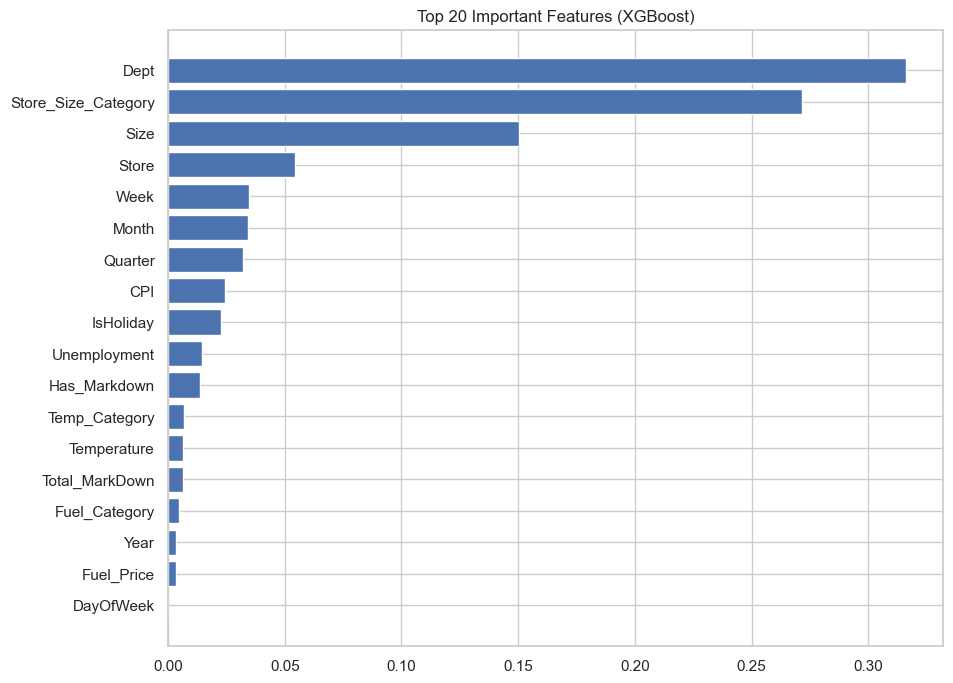

,Feature,Importance
1,Dept,0.316213
15,Store_Size_Category,0.271479
14,Size,0.150341
0,Store,0.054556
5,Week,0.034562
4,Month,0.034417
7,Quarter,0.032136
10,CPI,0.024506
2,IsHoliday,0.022586
11,Unemployment,0.014495


In [60]:
 importance = xgb.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feat_imp['Feature'].head(20), feat_imp['Importance'].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Important Features (XGBoost)")
plt.show()

feat_imp.head(20)

In [62]:
X_test = test_full[feature_cols]
test_predictions = xgb.predict(X_test)


In [63]:

# 2) Prepare X_test
X_test = test_full[feature_cols]

# 3) Predict
test_predictions = xgb.predict(X_test)

len(test_predictions)


115064

In [64]:
test_full['Id'] = (
    test_full['Store'].astype(str) + "_" +
    test_full['Dept'].astype(str) + "_" +
    test_full['Date'].astype(str)
)


## STEP 7 - Submission

In [92]:
"""submission = pd.DataFrame({
    'Id': test_full['Id'],
    'Weekly_Sales': test_predictions
})"""


In [93]:
"""submission.to_csv("submission.csv", index=False)"""


In [9]:
"""features_clean = features.fillna(0)  # or any placeholder you like
#features_clean.to_csv("clean_features.csv", index=False)

#Used this to create Cleaned File"""

'features_clean = features.fillna(0)  # or any placeholder you like\n#features_clean.to_csv("clean_features.csv", index=False)\n\n#Used this to create Cleaned File'